<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

# **Artificial Intelligence - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 

### Instructor: Enrique Naredo
### ET5003_Etivity-1

## Introduction

In [1]:
#@title Current Date
Today = '2021-09-19' #@param {type:"date"}

In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20158327" #@param {type:"string"}
Student_full_name = "Xiaoming Zhang" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

## Problem
The problem presented is to use general-recipe multinomial logistic classifier and Bayesian multinomial logistic classifier to classify images from the MNIST database of handwritten digits.

Details tasks:

Select 3 digits at random and perform  the following task. 

1. Your goal is to use Bayesian multinomial logistic regression (as in the road-sign notebook) to solve this classification problem. 

2. You can downsize the training dataset (e.g., 40% training and 60%testing) if the computation of the posterior takes too much time in your computer.

3. Use the posterior uncertainty to detect the instances (digits) in the test set that are hard to classify and remove them from the test-set.

4. Then you need to compute again the accuracy of the general-recipe logistic regression on the remaining (non-difficult) instances and comment on the result.

5. In practice, the task is to use uncertainty estimation to detect the difficult instances in the test-set. This is equivalent to refuse to classify all high-uncertainty instances or, in other words, when we are uncertain we say "I don't know" and we do not return any class. In this way, you will learn how uncertainty can be used to make safer decisions, by detecting the instances that are difficult to classify.

## Dataset

The MNIST database  is a dataset of handwritten digits that has been and is extensively used in machine learning. There are $10$ classes, each image is $28\times28$ pixels and, therefore, each input is $x_i\in\mathbb{R}^{784}$. 

The data set contains 60,000 training images and 10,000 testing images. The database is based on the NIST database. The NIST database was compiled from American Census Bureau employees and high school students. The training set comes from the American Census Bureau employees and the testing set has been taken from American high school students. As a result of the difference between the groups it was posited that this database may not be efficient for machine learning.

The MNIST database is compiled as follows;
50% of the training data is taken from the NIST training set.
50% of the training data is taken from the NIST test set.
50% of the testing data is taken from the NIST training set.
50% of the testing data is taken from the NIST test set.

The MNIST database is maintained by Yann LeCun, (Courant Institute, NYU) Corinna Cortes, (Google Labs, New York) and Christopher J.C. Burges, (Microsoft Research, Redmond).

## Method

Multinomial Logistic Regression (MLR) is used to classify the images in the MNIST database.

MLR is an extension of Binary Logistic Regression (BLR) in which numerous binary models are deployed simultaneously.
Multinomial logistic regression is used to classify categorial outcomes rather than continuous outcomes. Multinomial models do not assume normality, linearity or homoscedasticity. This makes it a strong modelling choice as real world data can often display these imperfections.

A Bayesian Multinomial Logistic Regression (BMLR) is built to classify the handwritten numbers in the MNIST Database

Multinomial logistic regression is a classifiaction technique that is used to predict the category of of an input or the probability of its membership to a category. This is calculated based on multiple independent variables taht are either binary or continuous. Multinomial logistic regression allows for for the dependent variable to be part of more than two categories (Czepiel, n.d.)(Carpita, et al., 2014).

To build the classifier we must first understand its basic construction. The formula for BMLR is:

$Pr(Y_{ik} = Pr(Y_i = k\mid x_i; \beta_1 , \beta_2 , ..., \beta_m) = \frac{\displaystyle\exp(\beta_{0k} + x_i \beta_k)}{\displaystyle\sum_{j=1}^{m}\exp(\beta_{0j} + x_i\beta_j)}$ with $k = 1,2,...$

where $\beta_k$ is a row vector of regression coefficients of $x$ for the $k$th category of $y$

Since multinomial logistic regression is an expansion of binary logistic regression we will first define a binary model.

Logistic regression assumes that for a single data point $(x,y)$:

$P(Y = 1 \mid X = x) = \sigma(z)$ where $z = \theta_0 + \displaystyle\sum_{i = 1}^{m} \theta_i x_i$

where $\theta$ is a vector of parameters of length $m$ the values of these parameters is found from $n$ training examples.

This is equivalent to:
$P(Y =1 \mid X = x) = \sigma(\theta^Tx)$

Maximum likelihood estimation (MLE) is used to choose the parameter values of the logistic regression. To do this we calculate the log-likelihood and find the values of $\theta$ that maximise it.

Since the predictions being made are binary we can define each label as a Bernoulli random variable. The probability of one data point can thus be written as:

$P(Y = y\mid X=x) = \sigma(\theta^Tx)^y \cdot [1 - \sigma(\theta^Tx)]^{(1-y)} $

The likelihood of all of the data is defined as follows:

The likelihood of the independent training labels:

$L(\theta) = \displaystyle\prod_{i =1}^n P(Y = y^{(i)} \mid X = x^{(i)})$

Using the likelihood of a Bernoulli we get
$L(\theta) = \displaystyle\prod_{i =1}^n P(Y = y^{(i)} \mid X = x^{(i)}) = \displaystyle\prod_{i=1}^n\sigma(\theta^Tx^{(i)})^{y^{(i)}} \cdot [1-\sigma(\theta^Tx^{(i)})]^{(1-y^{(i)})}$

Therefore the log-likelihood of the logistic regression is:

$LL(\theta) = \displaystyle\sum_{(i=1)}^ny^{(i)}\log[\sigma(\theta^Tx^{(i)}) + (1 - y^{(i)}) \log[1 - \sigma(\theta^Tx^{(i)})]$

By using a partial derivative of each parameter we can find the values of $\theta $ that maximise the log-likelihood.

The partial derivative of $LL(\theta)$ is;

$\frac{\partial LL(\theta)}{\partial\theta_j} = \displaystyle\sum_{i=1}^n [y^{(i)} - \sigma(\theta^Tx^{(i)})]x^{(i)}_j$

Using this various optimisation techniques can be deployed to identify the maximum likelihood. A typical binary logistic regression might use gradient decent, however multinomial classifiers will likely use more sophisticated techniques (Monroe, 2017).

## 1. Libraries

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Import libraries
# Sklearn modeules for pre-processing, validating and Logestic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Generic Python modules
import pandas as pd
import numpy as np
import random

# Visuals: Seaborn and matplotlib
import seaborn as sns
from skimage.io import imshow
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# ymc3 module for statistical modeling
import pymc3 as pm

# Theano efficiently evaluates mathematical expressions
import theano as tt

# Pickle saves/loads pythonic objects as bin
import pickle

In [6]:
# Setting a seed:
np.random.seed(100)

## 2. Dataset

### 2.1 Loading the MNIST dataset

My test is running in both Colab and local Juypter.<br>
Mnist test data was downloaded from the shared folder. The path in my local is: ./mnist_data/ and the path in colab is: /content/drive/MyDrive/Colab Notebooks/mnist/Data/

In [7]:
is_COLAB = 'google.colab' in str(get_ipython())
if is_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    Path = '/content/drive/MyDrive/Colab Notebooks/mnist/Data/'
else:
    Path = 'mnist_data/'

In [8]:
# MNIST Data
train_data = Path + 'mnist_train.csv'
test_data = Path + 'mnist_test.csv'

# train data
df_train = pd.read_csv(train_data)
X_train = df_train.drop("label",axis=1).values
y_train = df_train.label.values
print(X_train.shape)

# test data
df_test = pd.read_csv(test_data)
X_test = df_test.drop("label",axis=1).values
y_test = df_test.label.values
print(X_test.shape)

(60000, 784)
(10000, 784)


### 2.2 Normalise the Data

In [9]:
# Normalizing the Inputs:
X_train = X_train/255
X_test = X_test/255

# Printing the new input range of values:
minv = np.min(X_train)
maxv = np.max(X_train)
print(minv,maxv)

0.0 1.0


### 2.3 Description of Data:

In [10]:
# Number of examples
n_train =  len(X_train)
n_test =  len(X_test)

# Shape of an traffic sign image
image_shape = X_train.shape[1]

# unique classes/labels in the training dataset.
alltotal = set(y_train)
n_classes = len(alltotal)

print("Number of Training examples =", n_train)
print("Number of Test examples =", n_test)
print("Image input shape =", image_shape)
print("Number of classes =", n_classes)

Number of Training examples = 60000
Number of Test examples = 10000
Image input shape = 784
Number of classes = 10


### 2.4 Class Distribution:

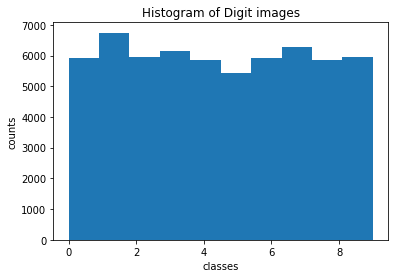

In [11]:
fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist(y_train, n_classes)
ax.set_xlabel('classes')
ax.set_ylabel('counts')
ax.set_title(r'Histogram of Digit images')
plt.show()

### Comments:
The train data is even distributed. Most of the numbers are around 6000 times

## 3. Downsampling

### 3.1 Randomly selecting 3 of the 10 Digit Classes

In [12]:
# We select the number of Classes we want:
n_classes = 3

# Empty list to append the random digit classes we select:
classes = []

# We select 3 digits at random and make sure they are unique:
while len(classes) < n_classes:
    
    # Randomly drawing a digit from 0-9:
    num2choose = np.random.randint(0,10)

    # Append the digit if it's not already in our list of classes:
    if num2choose not in classes: 
        classes.append(num2choose)
        
# Sorting the Classes smallest to largest    
classes.sort()
# print classes selected
classes

[3, 7, 8]

In [13]:
# The number of instances we'll keep for each of our 3 digits:
inst_class = 1000

inputs = []
labels = []
# Loop to randomly sample the instances for each digit:
for r in classes:
    imgs = X_train[np.where(y_train==r)[0],:]
    inputs.append(imgs[np.random.permutation(imgs.shape[0]),:][0:inst_class,:])
    labels.append(np.ones(inst_class)*r)
    
# Shaping inputs and labels in the right format    
X_train = np.vstack(inputs).astype(np.float64)
y_train = np.hstack(labels)

In [14]:
X_train.shape, y_train.shape

((3000, 784), (3000,))

New Classes Distribution

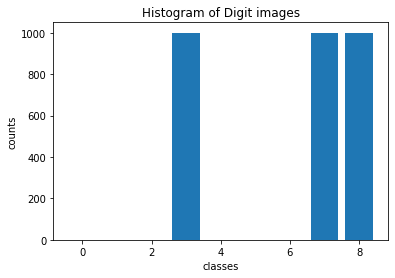

In [15]:
# new histogram
fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist(y_train, bins=range(10), align="left", rwidth=0.8)
ax.set_xlabel('classes')
ax.set_ylabel('counts')
ax.set_title(r'Histogram of Digit images')
plt.show()

In [16]:
# plot digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gist_yarg', **options)
    plt.axis("off")

In [17]:
def random_labels(y_train, cnt=5):
    """
    random_labels: Randomly generate cnt lables for each digital number
    :param y_train: y_train (Array)
    :param cnt: The count of labels (int)
    :return: list[int]
    """
    labels = []
    class_cnt = len(set(y_train))
    len_y_train = len(y_train)
    width = int(len_y_train/class_cnt)
    for i in range(class_cnt):
        row = np.random.choice(width, cnt, replace=False) + i*width
        #print(row)
        labels.extend(row)
    return labels

Text(0.5, 1.0, 'Original')

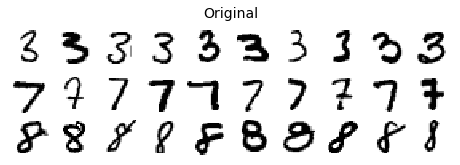

In [18]:
# Show a few instances from each Digit:
plt.figure(figsize=(8,8))

# Selecting a few label indices from each of the 3 classes to show:
# Randomly choose a few label indices. 10 labels for each Digit
label_indices = random_labels(y_train, cnt=10)

# Plotting 'original' image
plot_digits(X_train[label_indices,:],images_per_row=10)
plt.title("Original", fontsize=14)

###  3.2 Splitting the Training data into both Training and Validation Sets:

- Although this is the Training set, we can still set aside some samples (for instance 20%) of the 3000 instances we have for Model Validation purposes.


- With that Validation Set, we can then select the amount of Uncertainty we are happy with from our Model to use out of sample on other unseen data.


- We can then test out how well our decision performs on the Test Set that we put aside earlier.

In [19]:
### Split tha dataset in training and validation sets
# choose the fraction of your validation data from the training set
w = 0.20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=w, random_state=0)
 
# Shuffling the training instaces around to randomize the order of inputs to the model:
X_train, y_train = shuffle(X_train, y_train)

In [20]:
# print shape of your validation and training set

print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_val Shape: {X_val.shape}')
print(f'y_val Shape: {y_val.shape}')

X_train Shape: (2400, 784)
y_train Shape: (2400,)
X_val Shape: (600, 784)
y_val Shape: (600,)


### 4. General-Recipe ML

In [21]:
# model
model_log = LogisticRegression(random_state=0, max_iter=2000, C=100, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)


# Classification:
y_pred_log = model_log.predict(X_val)
y_pred_logi_prob = model_log.predict_proba(X_val)

# Maybe taking the maximum probability 
# in any of the classes for each observation
prob_classmax = np.max(y_pred_logi_prob,axis=1)

# Computing the Accuracy:
original_accuracy = accuracy_score(y_pred_log, y_val)
print("Accuracy=", original_accuracy)

Accuracy= 0.9616666666666667


In [22]:
np.sort(prob_classmax)

array([0.55105937, 0.58706952, 0.61482748, 0.64130265, 0.65150755,
       0.71334551, 0.75165125, 0.77752602, 0.78000219, 0.80457218,
       0.85065103, 0.88736526, 0.90440242, 0.90972076, 0.91437944,
       0.93876412, 0.9396788 , 0.95068303, 0.95240734, 0.95749642,
       0.95950235, 0.96169225, 0.96196791, 0.96434085, 0.96623918,
       0.97159779, 0.97241535, 0.97355333, 0.97563012, 0.97610681,
       0.97663891, 0.97679795, 0.97757468, 0.98051568, 0.98068084,
       0.9819175 , 0.9846063 , 0.98507336, 0.98980397, 0.99044535,
       0.99162496, 0.99170046, 0.99204373, 0.99244889, 0.99267509,
       0.99302727, 0.99347011, 0.99383031, 0.99439994, 0.9944593 ,
       0.99448609, 0.99518273, 0.99542661, 0.99548108, 0.99563728,
       0.99577181, 0.99606641, 0.9968055 , 0.99704184, 0.99755325,
       0.99811918, 0.99812861, 0.99814208, 0.9983702 , 0.99838455,
       0.9983951 , 0.99854134, 0.9985593 , 0.99864967, 0.99873307,
       0.99880854, 0.99890244, 0.99905486, 0.99910984, 0.99914

In [23]:
# probability of general-recipe logistic regression in wrong instances
prob_classmax[y_pred_log!=y_val]

array([0.97663891, 0.65150755, 0.90972076, 0.95950235, 0.99244889,
       0.85065103, 0.75165125, 1.        , 0.95749642, 0.97679795,
       0.93876412, 0.99383031, 0.97355333, 0.99989755, 0.97159779,
       0.55105937, 0.80457218, 0.71334551, 0.97563012, 0.96434085,
       0.99890244, 0.98507336, 0.88736526])

In [24]:
np.array(y_pred_log)

array([3., 7., 7., 8., 8., 8., 8., 3., 7., 8., 7., 3., 3., 3., 7., 8., 7.,
       3., 3., 8., 8., 3., 7., 7., 8., 3., 7., 3., 7., 3., 8., 7., 8., 7.,
       7., 3., 3., 7., 8., 7., 7., 3., 3., 3., 3., 3., 8., 7., 8., 3., 7.,
       7., 3., 8., 3., 8., 8., 3., 8., 8., 8., 8., 8., 3., 8., 3., 7., 8.,
       3., 7., 7., 7., 7., 8., 7., 3., 3., 7., 7., 7., 7., 3., 3., 8., 3.,
       8., 3., 3., 7., 3., 7., 7., 3., 7., 3., 3., 7., 3., 3., 3., 8., 8.,
       3., 7., 3., 7., 7., 7., 3., 8., 7., 7., 7., 8., 7., 7., 8., 7., 7.,
       7., 8., 3., 8., 8., 3., 8., 7., 3., 8., 8., 7., 8., 8., 7., 3., 3.,
       8., 7., 8., 3., 8., 3., 8., 8., 3., 8., 7., 3., 7., 8., 3., 8., 8.,
       8., 3., 3., 7., 3., 3., 3., 7., 7., 3., 3., 7., 8., 7., 3., 7., 8.,
       3., 8., 8., 8., 7., 3., 7., 3., 8., 8., 3., 7., 8., 7., 8., 3., 7.,
       8., 8., 3., 8., 3., 3., 7., 7., 7., 3., 3., 3., 8., 3., 7., 3., 8.,
       7., 7., 8., 3., 8., 7., 7., 3., 7., 7., 8., 8., 3., 3., 3., 8., 3.,
       8., 8., 7., 8., 3.

## 5 Probabilistic Multinomial Logistic Regression:

The Multinomial Logistic Regression has some parameters:

- $\alpha$, which is the intercept term:

- $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature:

### 5.1 Encoding the Class labels for the Probabilistic ML Model:

This is an example:

- **[1,0,0]** for first digit
- **[0,1,0]** for second digit
- **[0,0,1]** for third digit

Here we are using sklearn.preprocessing.LabelBinarizer do do the class label encoding. Binarize labels in a one-vs-all fashion. During the learning phase,  it consists in learning one regressor or binary classifier per class. It converts multi-class labels to binary labels. During the prediction phase, it assigns the class for which the corresponding model gave the greatest confidence. 
It easily transfers [1, 3, 5] to:
[[1, 0, 0]
[0,1, 0]
[0, 0,1]]

Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [25]:
import sklearn.preprocessing
## We use LabelBinarizer to transfor classes into counts
# neg_label=0, pos_label=1 
y_2_bin = sklearn.preprocessing.LabelBinarizer().fit_transform(y_train.reshape(-1,1))

In [26]:
y_2_bin

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

### 5.2 Fit the PyMC3 Model

In [27]:
nf = X_train.shape[1]
# number of classes
nc = len(classes)
# floatX = float32
floatX = tt.config.floatX

init_b = np.random.randn(nf, nc-1).astype(floatX)
init_a = np.random.randn(nc-1).astype(floatX)


with pm.Model() as multi_logistic:
    # Prior
    β = pm.Normal('beta', 0, sigma=100, shape=(nf, nc-1), testval=init_b)
    α = pm.Normal('alpha', 0, sigma=100, shape=(nc-1,), testval=init_a)
    
    # we need to consider nc-1 features because the model is not identifiable
    # the softmax turns a vector into a probability that sums up to one
    # therefore we add zeros to go back to dimension nc
    # so that softmax returns a vector of dimension nc
    β1  = tt.tensor.concatenate([np.zeros((nf,1)),β ],axis=1)
    α1  = tt.tensor.concatenate([[0],α ],)
    
    # Likelihood
    mu = pm.math.matrix_dot(X_train,β1) + α1
    # It doesn't work if the problem is binary
    p = tt.tensor.nnet.nnet.softmax(mu)
    observed = pm.Multinomial('likelihood', p=p, n=1, observed=y_2_bin)

In [28]:
%%time
with multi_logistic:
    #approx = pm.fit(300000, method='advi') # takes longer
    approx = pm.fit(3000, method='advi')

Finished [100%]: Average Loss = 9,433.6


CPU times: user 21.3 s, sys: 1.04 s, total: 22.3 s
Wall time: 35.4 s


**Comments** <br>
I also tried to change the method from Automatic Differentiation Variational Inference (advi) to Stein Variational Gradient Descent (svgd), the accuracy was improved from .91 to .93. But svgd would take even longer time.

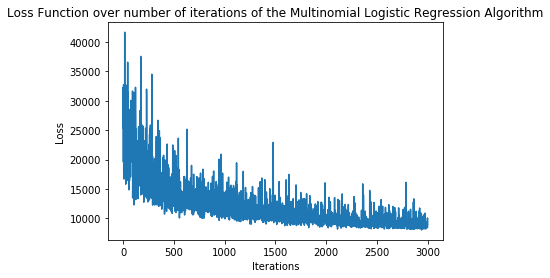

In [29]:
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Function over number of iterations of the Multinomial Logistic Regression Algorithm')
plt.plot(approx.hist)
plt.show()

**Comments** <br>
The above hist char shows the gradually descending loss at each iteration of the Multinomial Logistic Regression Model using PyMC3 'advi' method. The average loss per iteration after 3000 iterations has come down roughly from around 40,000 to 10,000.

In [30]:
dd = 300
posterior = approx.sample(draws=dd)

test image #10
posterior sample #100
true class= 7.0
classes: [3, 7, 8]
estimated prob= [0. 1. 0.]


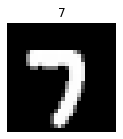

In [31]:
## The softmax function transforms each element of a collection by computing the exponential
#  of each element divided by the sum of the exponentials of all the elements.
from scipy.special import softmax

#select an image in the test set
i = 10 
#i = random.randint(0, dd)

#select a sample in the posterior
s = 100 
#s = random.randint(0, dd)


beta  = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
image = X_val[i,:].reshape(28,28)
plt.figure(figsize=(2,2))
plt.imshow(image,cmap="Greys_r")
plt.title(int(y_val[i]))
plt.axis('off')
np.set_printoptions(suppress=True)

print("test image #" + str(i))
print("posterior sample #" + str(s))
print("true class=", y_val[i])
print("classes: " + str(classes))
print("estimated prob=",softmax((np.array([X_val[i,:].dot(beta) + alpha])))[0,:])

### 5.3 Bayesian Prediction

In [32]:
# Bayesian prediction
# return the class that has the highest posterior probability
y_pred_Bayesian=[]

for i in range(X_val.shape[0]):
    val=np.zeros((1,len(classes)))
    
    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])     
        val = val + softmax((np.array([X_val[i,:].dot(beta) + alpha])))
    
    mean_probability = val/posterior['beta'].shape[0]
    y_pred_Bayesian.append( np.argmax(mean_probability))

In [33]:
print(y_pred_Bayesian)

[0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 

In [34]:
# recall the classes we are using
print(classes)

[3, 7, 8]


In [35]:
# prediction array (using classes)
nn = 10 # just an example
np.array(classes)[y_pred_Bayesian[0:nn]]

array([3, 7, 7, 8, 8, 8, 8, 3, 7, 8])

In [36]:
# using validation: y_val
print("Accuracy=", accuracy_score(np.array(classes)[y_pred_Bayesian], y_val))

Accuracy= 0.91


### Selecting different instances

In [37]:
y_predB=[]

for i in range(X_val.shape[0]):
    #print(i)
    val=[]

    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
        val.append(softmax((np.array([X_val[i,:].dot(beta) + alpha])))[0,:])

    #mean probability
    valmean = np.mean(val,axis=0)
    #class with maximum mean probability
    classmax = np.argmax(valmean)
    #ranks
    ranks = np.array(val.copy())
    ranks   = ranks  *0 #init
    colmax = np.argmax(np.array(val),axis=1)
    ranks[np.arange(0,len(colmax)),colmax]=1
     
    y_predB.append( [classmax, valmean[classmax], np.std(ranks,axis=0)[classmax]])

    
y_predB= np.array(y_predB)

In [38]:
# prediction array
mm = 10
y_predB[0:mm,:]

array([[0.        , 0.91134317, 0.29089899],
       [1.        , 0.99999397, 0.        ],
       [1.        , 0.98879094, 0.09949874],
       [2.        , 0.84344841, 0.35377331],
       [2.        , 0.86592326, 0.33993463],
       [2.        , 0.67731117, 0.45825757],
       [2.        , 0.5400944 , 0.49714742],
       [0.        , 0.96242247, 0.16110728],
       [1.        , 0.98971316, 0.08137704],
       [2.        , 0.96426736, 0.17950549]])

In [39]:
#sorting in descending order
difficult = np.argsort(-y_predB[:,2])
y_predB[difficult[0:mm],:]

array([[2.        , 0.49054639, 0.5       ],
       [0.        , 0.50133734, 0.49998889],
       [0.        , 0.50572215, 0.49998889],
       [2.        , 0.49207934, 0.49998889],
       [1.        , 0.5023346 , 0.49998889],
       [0.        , 0.48269145, 0.49998889],
       [2.        , 0.48588683, 0.49989999],
       [2.        , 0.48396561, 0.49982219],
       [0.        , 0.508613  , 0.49982219],
       [2.        , 0.50644149, 0.49972215]])

In [40]:
#probability of general-recipe logistic regression in wrong instances
prob_classmax[y_pred_log != y_val]

array([0.97663891, 0.65150755, 0.90972076, 0.95950235, 0.99244889,
       0.85065103, 0.75165125, 1.        , 0.95749642, 0.97679795,
       0.93876412, 0.99383031, 0.97355333, 0.99989755, 0.97159779,
       0.55105937, 0.80457218, 0.71334551, 0.97563012, 0.96434085,
       0.99890244, 0.98507336, 0.88736526])

In [41]:
y_predB[y_pred_log != y_val,:]

array([[2.        , 0.88939392, 0.3       ],
       [0.        , 0.66442573, 0.47140452],
       [1.        , 0.45071676, 0.49781746],
       [0.        , 0.65315559, 0.47590849],
       [2.        , 0.55815089, 0.49459299],
       [2.        , 0.95215521, 0.21092389],
       [0.        , 0.89103173, 0.29089899],
       [2.        , 0.84568401, 0.34698703],
       [2.        , 0.8281685 , 0.36660606],
       [2.        , 0.70154008, 0.4567883 ],
       [0.        , 0.78380373, 0.40491426],
       [2.        , 0.51158214, 0.49945526],
       [2.        , 0.97328923, 0.16110728],
       [0.        , 0.50572215, 0.49998889],
       [2.        , 0.66613748, 0.4689942 ],
       [0.        , 0.74154169, 0.41867516],
       [1.        , 0.99522643, 0.05763872],
       [1.        , 0.73411821, 0.43492017],
       [0.        , 0.45711054, 0.49811868],
       [2.        , 0.57945547, 0.49183331],
       [2.        , 0.47147171, 0.49945526],
       [0.        , 0.56331258, 0.49597267],
       [2.

### 5.4 Selecting Difficult and Easy Instances

In [42]:
## Difficult & easy instances

easy = np.argsort(y_predB[:,2])
print("Accuracy in easy instances =", accuracy_score(y_pred_log[easy[0:100]], y_val[easy[0:100]]))

difficult = np.argsort(-y_predB[:,2])
print("Accuracy in difficult instances =", accuracy_score(y_pred_log[difficult[0:100]], y_val[difficult[0:100]]))

Accuracy in easy instances = 0.99
Accuracy in difficult instances = 0.89


**Comments** <br>
The accuracy of easy instance is much higher than the difficult instances.

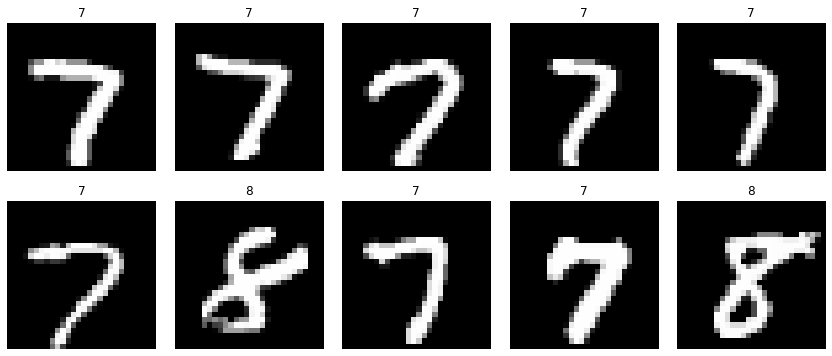

In [43]:
# show 10 random 'easy' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(10):
    index = easy[i]
    image = X_val[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image,cmap="Greys_r")
    axs[i].set_title(int(y_val[index]))
    

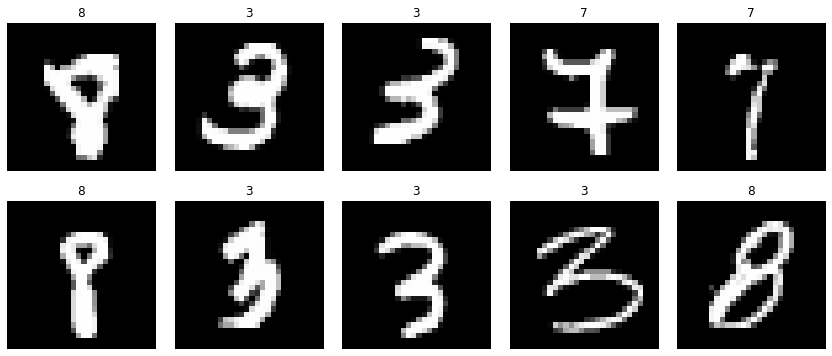

In [44]:
# show 10 random 'difficult' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = difficult[i]
    image = X_val[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image,cmap="Greys_r")
    axs[i].set_title(int(y_val[index]))
    
    

## 6 Remove the difficult Instances

### 6.1 Plot the mean probability for each digits sorted by the diffculty.

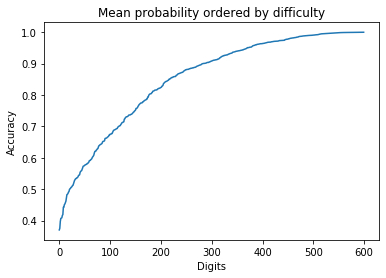

In [45]:
y_predB_sorted_by_difficulty = np.sort(y_predB[:,1])

plt.plot(y_predB_sorted_by_difficulty)
plt.title('Mean probability ordered by difficulty')
plt.xlabel('Digits')
plt.ylabel('Accuracy')
plt.show()

### 6.2 Remove the most difficult images from the General Receipe ML

In [46]:
# The initial accuracy score of General Receipe ML  without samples removed
print('The initial accuracy of General Receipe ML without samples removed: %f' % (original_accuracy))

# Remov 100 difficult samples
difficult = np.argsort(-y_predB[:,2])
new_X_val = np.delete(X_val, difficult[0:100], axis=0)
new_Y_val = np.delete(y_val, difficult[0:100], axis=0)
new_Y_pred = model_log.predict(new_X_val)
new_accuracy = accuracy_score(new_Y_pred, new_Y_val)
print('Accuracy of General Receipe ML after removed %s difficult samples: %f' % (X_val.shape[0] - new_X_val.shape[0], new_accuracy))

# Remov 200 difficult samples
new_X_val = np.delete(X_val, difficult[0:200], axis=0)
new_Y_val = np.delete(y_val, difficult[0:200], axis=0)
new_Y_pred = model_log.predict(new_X_val)
new_accuracy = accuracy_score(new_Y_pred, new_Y_val)

print('Accuracy of General Receipe ML after removed %s difficult samples: %f' % (X_val.shape[0] - new_X_val.shape[0], new_accuracy))

# Remov 300 difficult samples
new_X_val = np.delete(X_val, difficult[0:300], axis=0)
new_Y_val = np.delete(y_val, difficult[0:300], axis=0)
new_Y_pred = model_log.predict(new_X_val)
new_accuracy = accuracy_score(new_Y_pred, new_Y_val)

print('Accuracy of General Receipe ML after removed %s difficult samples: %f' % (X_val.shape[0] - new_X_val.shape[0], new_accuracy))

# Remov 400 difficult samples
new_X_val = np.delete(X_val, difficult[0:400], axis=0)
new_Y_val = np.delete(y_val, difficult[0:400], axis=0)
new_Y_pred = model_log.predict(new_X_val)
new_accuracy = accuracy_score(new_Y_pred, new_Y_val)

print('Accuracy of General Receipe ML after removed %s difficult samples: %f' % (X_val.shape[0] - new_X_val.shape[0], new_accuracy))

The initial accuracy of General Receipe ML without samples removed: 0.961667
Accuracy of General Receipe ML after removed 100 difficult samples: 0.976000
Accuracy of General Receipe ML after removed 200 difficult samples: 0.980000
Accuracy of General Receipe ML after removed 300 difficult samples: 0.990000
Accuracy of General Receipe ML after removed 400 difficult samples: 0.990000


We can see the accuracy was continuouly improved after removed more difficult instances.

## 7 Summary

**Code Location** <br>
Here is my code in Github for Etivity 1:
https://github.com/zhares999/ET5003_SEM1_2021-2/blob/week0_XiaomingZhang/Week-1/Etivity_1_XiaomingZhang_20158327.ipynb

**Test Data** <br>
The Mnist test data was downloaded from the shared folder:

https://ulcampus-my.sharepoint.com/personal/enrique_naredo_ul_ie/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fenrique%5Fnaredo%5Ful%5Fie%2FDocuments%2FAI%5FMSc%2FCurrentModules%2FShared%2FET5003%20SEM1%202021%2D2%2FMaterial%2FWeek%2D1&originalPath=aHR0cHM6Ly91bGNhbXB1cy1teS5zaGFyZXBvaW50LmNvbS86ZjovZy9wZXJzb25hbC9lbnJpcXVlX25hcmVkb191bF9pZS9FdnhGWTdnZDRMZERuN2xGd21RYnZnNEJNZkhsc3k1Vktaa3ZGcXByYUM3MjhBP3J0aW1lPXZGWklkbGg1MlVn

**Environment** <br>
It’s my first time to use Colab. It’s easy to use and convenient to share. I’m glad to do the development on the cloud directly. It’s a nice experience. But meanwhile I also run it from my local Anaconda Jupyter notebook and Pycharm. Pytharm is easy do the debug, it’s a necessary tool for me when try to do some quick test and validation.

I followed the steps of traffic lights example notebook to complete the handwritten digits for this Etivity. 

**Data Preparation** <br>
Firstly, I loaded the Mnist data and check the data set. It includes 60000 training data set and 10000 testing data set. And each image is 28 * 28 pixels. Based on the bar chart, I can see the training data is evenly distributed. Most of the numbers are around 6000 times. It’s very good for the prediction, no imbalanced dataset.

I randomly select 3 of the 10 digit classes. And the number of each instances is 1000. In order to have an initial idea of the data, I print the original data through pyplot.imshow. I created a function random_lanbels to randomly generate the given count (default 5) labels for each digital number.

I split the testing data set into 2 data sets through sklearn function train_test_split. 80% as training data set, and 20% as validation data set.

**General-Recipe ML** <br>
I use multinomial Logistic Regression to do the training. The accuracy is around .96. It’s pretty good.

**Encoding the Class labels** <br>
Encoding the Class labels for the Probabilistic ML Model:
I use sklearn.preprocessing.LabelBinarizer to do the class label encoding. Binarize labels in a one-vs-all fashion. During the learning phase, it consists in learning one regressor or binary classifier per class. It converts multi-class labels to binary labels. During the prediction phase, it assigns the class for which the corresponding model gave the greatest confidence. It easily [1, 0, 0] as the first digit, [0, 1, 0] as the second digit and [0, 0, 1] as the third digit.

**Probabilistic Multinomial Logistic Regression** <br>
I used Probabilistic Multinomial Logistic Regression with PyMC3 to do the training. 
For the PyMC3 model, it created stochastic random variables with Normal prior distributions for the regression coefficients with a mean of 0 and standard deviation of 100, The softmax function was used to normalize a vector into a probability distribution over the predicted output classes. In this case, softmax returns three probabilities for each digit 3, 7 or 8. The PyMC3 model run 3000 iterations, and the loss was decreasing gradually from around 40,000 to 10,000. 

It used Bayesian to predict the class that has the highest posterior probability.
The posterior probability is the probability of event A occurring given that event B has occurred. The Bayesian model achieves accuracy (.91) that is lower than the multinomial logistic regression (.96).  I also tried to change the method from Automatic Differentiation Variational Inference (advi) to Stein Variational Gradient Descent (svgd), and the accuracy was improved from .91 to .93 (But svgd would take even longer time). But it still not better than multinomial logistic regression (.96). Even for this use case it’s not better than multinomial logistic regression, but it’s suitable to use uncertainty estimation to detect the difficult instances in the data set. It provides a solution to identify the difficulty samples and remove then out of the dataset.

**Remove the difficult Instances** <br>
After removed the most difficult samples from the dataset, the acuracy continuously improved.

**Conclusions** <br>
1.	Multinomial logistic regression: <br>
Accuracy is: .96. <br>
It’s a simple solution with very good accuracy. It’s suitable to train a model to classify a multinomial dataset.
2.	Probabilistic Multinomial Logistic Regression: <br>
Accuracy is: .91. <br>
Accuracy in easy instances = 0.99 <br>
Accuracy in difficult instances = 0.89 <br>
It provides a solution to identify the difficulty samples and remove then out of the dataset. It’s suitable to use uncertainty estimation to detect the difficult instances in the data set.

**Others** <br>
I also learnt a lot interesting Numpy tricks:
1.	reshape() allow us to give one of new shape parameter as -1. It means it is an unknown dimension and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the above mentioned criteria. 
2.	np.hstack and np.vstack are very useful when Stack arrays in sequence horizontally/ vertically

**Acknowledgement** <br>
Thanks Mark Cahill for facilitating the teams 3 group discussion. It’s very helpful to have the communication and improved the understanding of the task. James Gibbons’s solution is very helpful to use the same notebook to run in both local Jupyther notebook and Colab. Darren White provided a great guide of the task and helped to complete the draft version. 

**Reference** <br>

John S., Thomas V.W. , Christopher F. (2020) Getting started with PyMC3 [Online] Available at: 
https://docs.pymc.io/notebooks/getting_started.html[Accessed 15 September 2021].

Nadheesh J. (2018) Comparing Bayesian and Classical Learning Techniques for Solving Regression and Classification Problems. [Online] Available at: 
https://wso2.com/blog/research/comparing-bayesian-and-classical-learning-techniques/ 
[Accessed 15 September 2021]

Czepiel, S. A., n.d. Maximum Likelihood Estimation of Logistic Regression Models: Theory and Implementation. [Online] Available at: 
https://czep.net/stat/mlelr.pdf 
[Accessed 15 September 2021].

Monroe, W., 2017. Stanford.edu. [Online] 
Available at: https://web.stanford.edu/class/archive/cs/cs109/cs109.1178/lectureHandouts/220-logistic-regression.pdf
[Accessed 12 September 2021].

End